In [396]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
"""
OD_Matrix_pc_75.csv
population_pt_75.csv
OD_Matrix_pt_75.csv
population_pc_75.csv
population.csv
"""
percent_pop = "100"
folder = "workrestriction"
incubation = 7

melbourne_pc = pd.read_csv('data/'+folder+'/population_pc_'+percent_pop+'.csv', sep=',',header=None)
pop_pc       = melbourne_pc.values
pop_pc       = np.nan_to_num(pop_pc, copy = True)
pop_pc       = pop_pc.astype(int)

od_matrix_pc = genfromtxt('data/'+folder+'/OD_Matrix_pc_'+percent_pop+'.csv', delimiter=',')
od_matrix_pc = np.reshape(od_matrix_pc, (12,309,309))
od_matrix_pc = np.nan_to_num(od_matrix_pc, copy = True)
od_matrix_pc = od_matrix_pc.astype(int)

melbourne_pt = pd.read_csv('data/'+folder+'/population_pt_'+percent_pop+'.csv', sep=',',header=None)
pop_pt       = melbourne_pt.values
pop_pt       = np.nan_to_num(pop_pt, copy = True)
pop_pt       = pop_pt.astype(int)

od_matrix_pt = genfromtxt('data/'+folder+'/OD_Matrix_pt_'+percent_pop+'.csv', delimiter=',')
od_matrix_pt = np.reshape(od_matrix_pt, (12,309,309))
od_matrix_pt = np.nan_to_num(od_matrix_pt, copy = True)
od_matrix_pt = od_matrix_pt.astype(int)

#At this point only have 25% for pop and flow, now we scale them up


pop_pc = pop_pc*4
od_matrix_pc = od_matrix_pc*4

pop_pt = pop_pt*4
od_matrix_pt = od_matrix_pt*4

for i in range(1,12):
    pop_pc[i,:] = pop_pc[0,:]
    pop_pt[i,:] = pop_pt[0,:]

to_this_origin_pc   = np.sum(od_matrix_pc,axis = 1)
from_this_origin_pc = np.sum(od_matrix_pc,axis = 2)

to_this_origin_pt   = np.sum(od_matrix_pt,axis = 1)
from_this_origin_pt = np.sum(od_matrix_pt,axis = 2)

In [258]:
pop = np.sum(pop_pc,axis=1)[0] + np.sum(pop_pt,axis=1)[0]
pop

4241848

In [397]:
import numpy as np
import pickle 
import matplotlib.pyplot as plt
import random
from collections import namedtuple


Param = namedtuple('Param', 'R0 DI I0 HospitalisationRate HospiterIters')

random.seed(30)

OD_id = [p for p in range (0,309)]

r = od_matrix_pc.shape[0]
n = pop_pc.shape[1]

initialInd = random.sample(OD_id, 20)
initial = np.zeros(n)
initial[initialInd] = 15

model = Param(R0 = 2.4, DI = incubation*12, I0 = initial, HospitalisationRate=0.1,HospiterIters=15*12)

%run SIR-mobility-mode.py

res = {}
iterations = 3000
inf = 10

res['baseline'] = sir(model,pop_pc,od_matrix_pc,pop_pt,od_matrix_pt,iterations,inf)

/Users/cptnemo2005/Desktop/SEIR/SIR-mobility-mode.py:54: RuntimeWarning: invalid value encountered in true_divide
  realflow_pc = realflow_pc / realflow_pc.sum(axis=2)[:,:, np.newaxis]
/Users/cptnemo2005/Desktop/SEIR/SIR-mobility-mode.py:57: RuntimeWarning: invalid value encountered in true_divide
  realflow_pt = realflow_pt / realflow_pt.sum(axis=2)[:,:, np.newaxis]


In [398]:
newI_inf = res['baseline'][4] + res['baseline'][5] 

newI_inf.astype(int)

newI_inf = np.sum(newI_inf,axis=0)

In [390]:
newI_base = res['baseline'][4] + res['baseline'][5] 

newI_base.astype(int)

newI_base = np.sum(newI_base,axis=0)

In [399]:
newI = newI_inf - newI_base  
newI = newI.astype(int)
#newI =  np.where(newI > 0, 0, newI) 
newI

array([ -975,  -974, -1031, -2261,  -577,  -318, -1205,  -721, -1482,
       -1202,  -664, -1060,  -973,  -989, -1800, -1699, -1486, -1347,
       -1369, -2318,  -717, -1596,  -883, -1221,  -578, -1254, -1495,
       -1137, -1790,  -501, -2730, -1500,  -858, -1711,  -905,  -831,
       -1020, -2339, -1465, -1423,  -330, -1884,  -969, -2356, -1134,
       -1177,  -902, -1838, -2145, -2923, -3687, -2377, -2081,  -916,
       -2488, -1979, -2819, -1921, -1363,  -808, -1068, -2041,  -992,
        -715,  -529, -1781, -1834, -2317, -1546, -2137, -2105,  -571,
       -1018, -1784, -1576, -2087,  -421, -3332, -2018, -2916,  -520,
       -1274,  -767, -2807, -2089, -1740, -1511, -1312, -1897, -1356,
       -1486,  -950, -1863,  -750, -2886, -1510, -1425, -1482,  -833,
       -1542,  -613, -1977, -1296,  -515,  -953, -1309, -1002, -1458,
       -1570, -2299,  -141, -2382,  -627, -2234, -1264, -1364, -1808,
        -915, -1368, -1302, -2184, -1411, -1208,  -955, -3178, -1013,
       -1944,  -707,

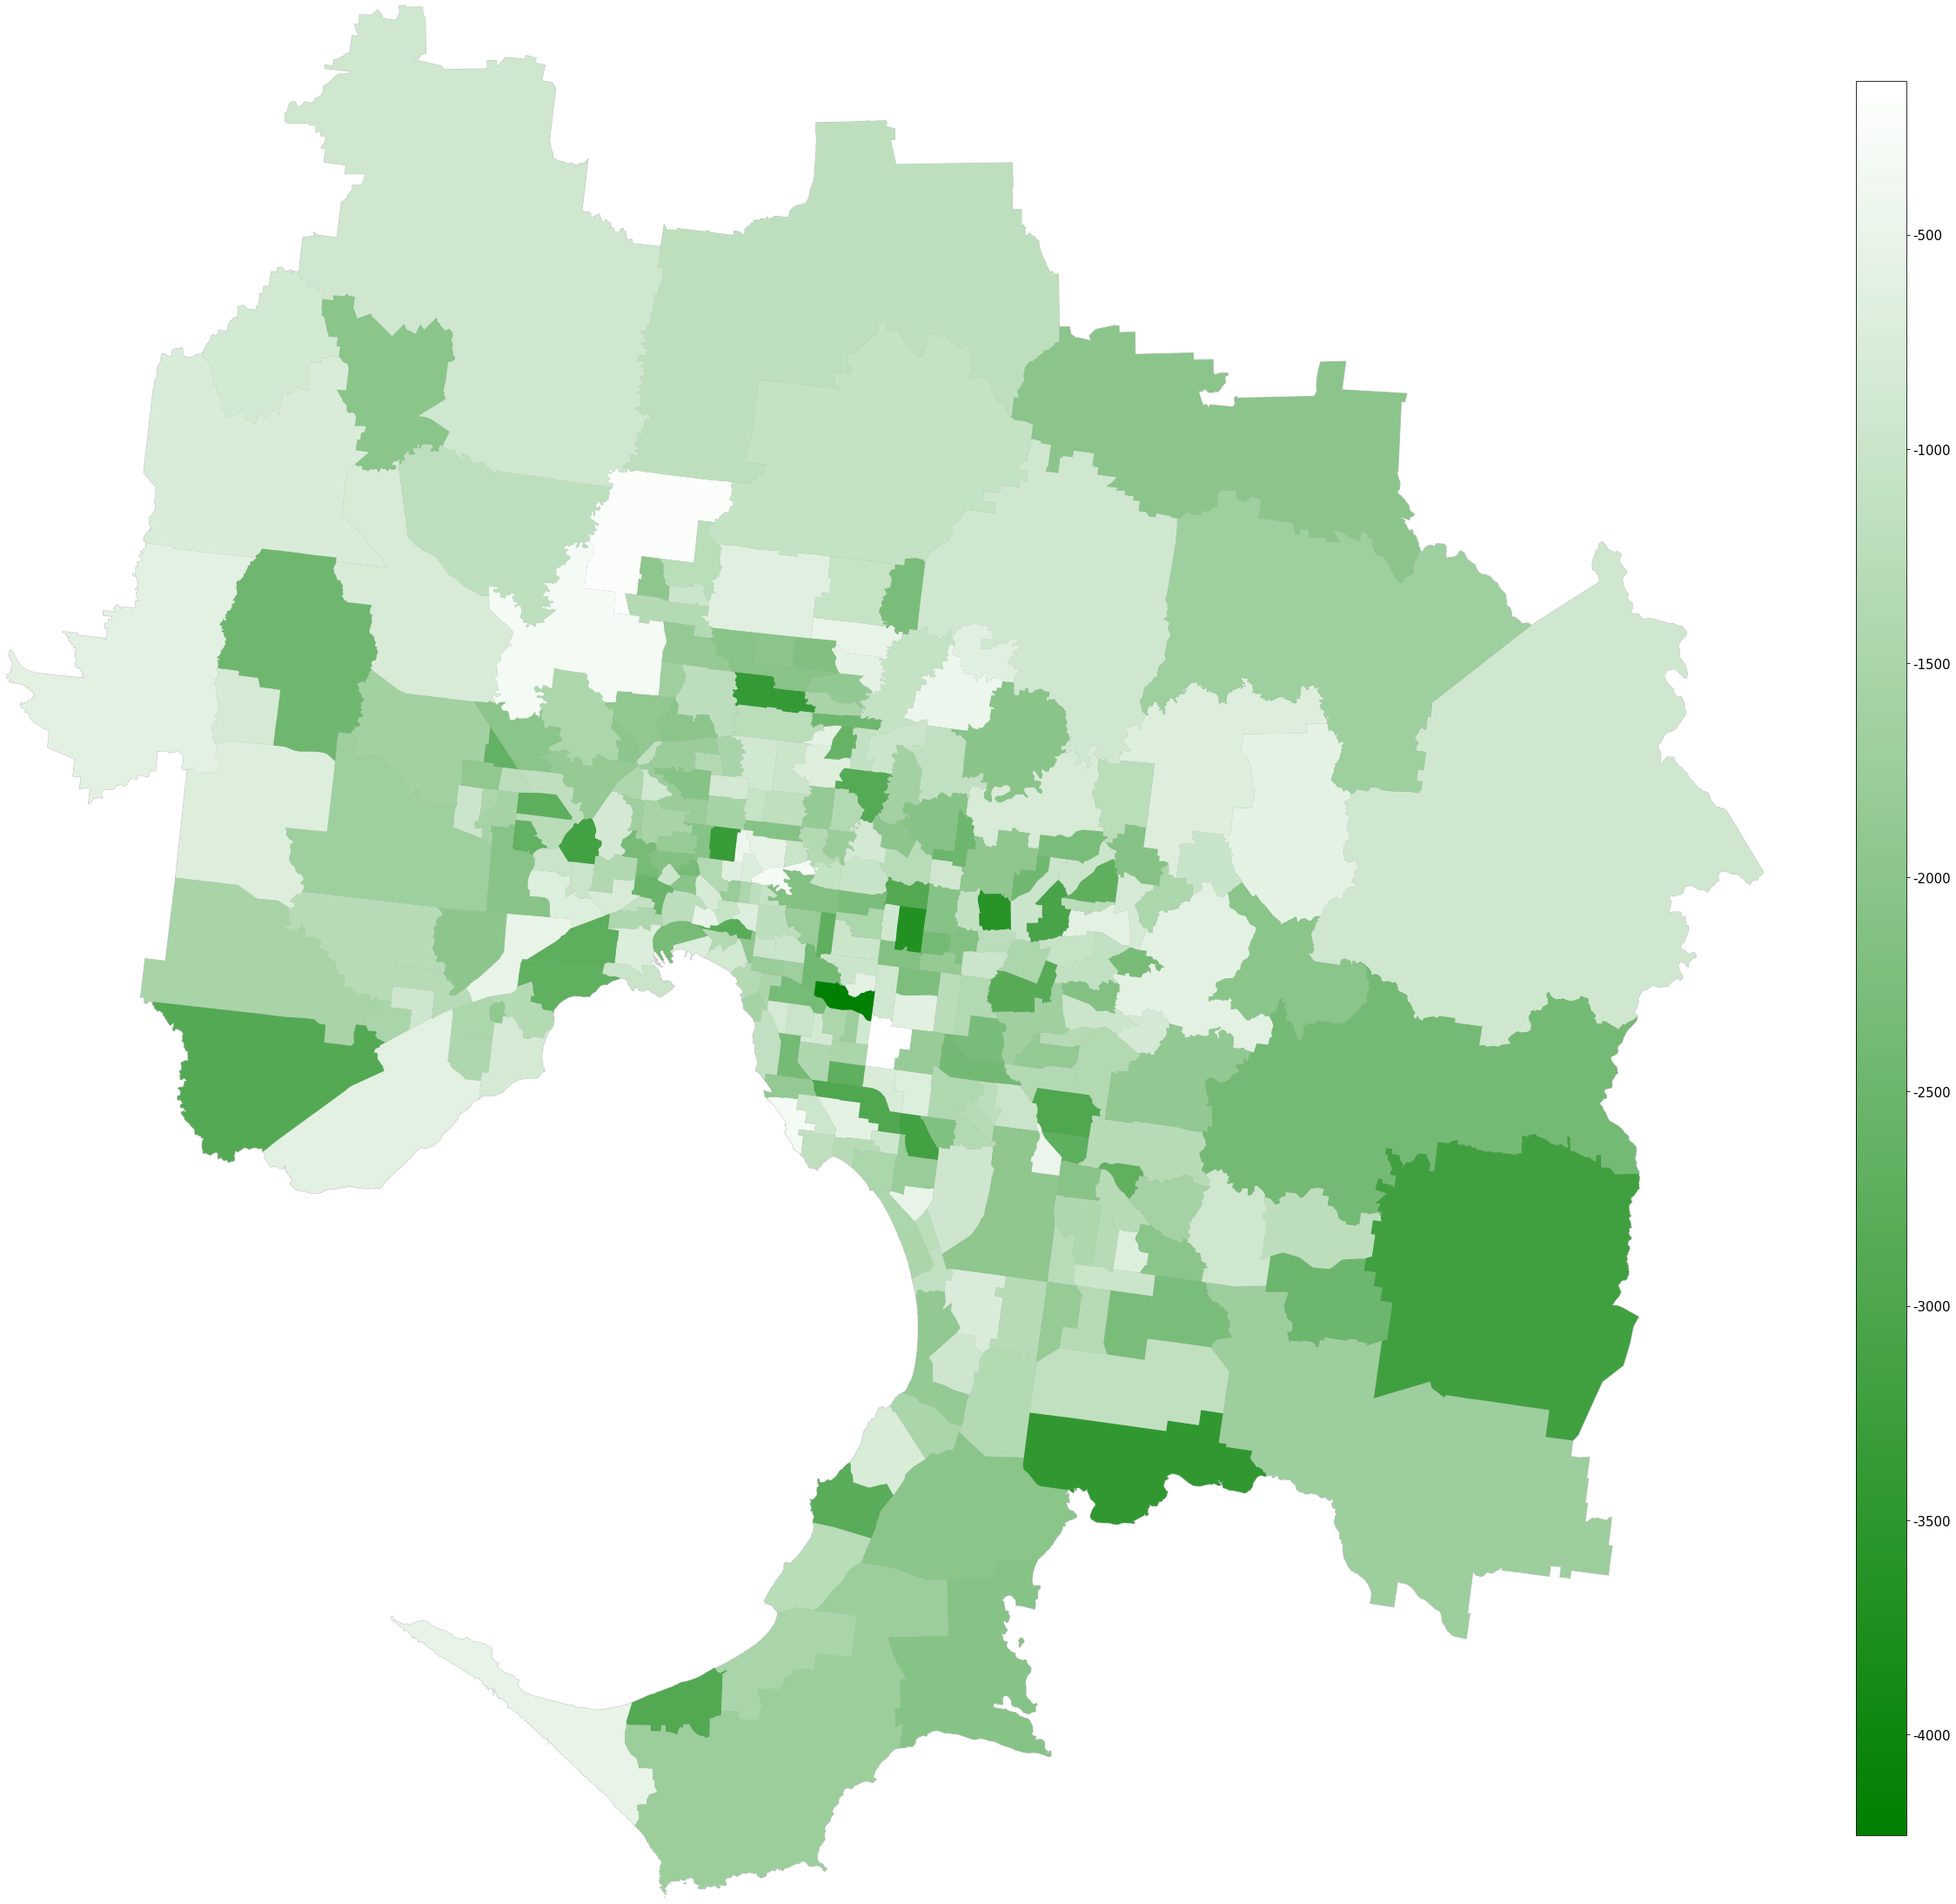

In [400]:
import geopandas as gpd
import contextily as ctx
from matplotlib.colors import LinearSegmentedColormap


melbourne_gdf = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")

melbourne_gdf_3857 = melbourne_gdf.to_crs(epsg = 3857)

west,south,east,north = melbourne_gdf_3857.unary_union.bounds


melbourne_gpd = gpd.read_file("/Users/cptnemo2005/Downloads/shapefiles/SA2_studyarea_16_z55.shp")
melbourne_gpd['population'] = newI



plt.rcParams.update({'font.size':32})
west,south,east,north = melbourne_gpd.unary_union.bounds

fig,ax = plt.subplots(figsize=(40,40))



cmap = LinearSegmentedColormap.from_list('mycmap', [ 'green','white'])
melbourne_gdf.plot(ax=ax,facecolor='none',edgecolor='gray',alpha=0.5,linewidth=1,zorder=2)
melbourne_gpd.plot(ax=ax, column='population',legend=False,cmap=cmap,zorder=3)
cbax = fig.add_axes([0.9,0.15,0.02,0.7])

sm = plt.cm.ScalarMappable(cmap=cmap,\
                          norm=plt.Normalize(vmin=min(melbourne_gpd.population),
                                             vmax=max(melbourne_gpd.population)))

sm._A=[]

fig.colorbar(sm,cax=cbax,format="%d")

ax.set_xlim(west,east)
ax.set_ylim(south,north)

ax.axis('off')
plt.savefig(work_restriction_result+'base_vs_work_'+percent_pop+'-'+str(iterations)+'-iterations.jpg')
#plt.savefig(work_restriction_result + 'base_case_{}.jpg'.format(iterations))

plt.show()

(256, 4)
[[1.         0.96078431 0.94117647 1.        ]
 [0.99987697 0.95820069 0.93748558 1.        ]
 [0.99975394 0.95561707 0.93379469 1.        ]
 ...
 [0.41917724 0.00369089 0.05294887 1.        ]
 [0.4115494  0.00184544 0.05196463 1.        ]
 [0.40392157 0.         0.05098039 1.        ]]


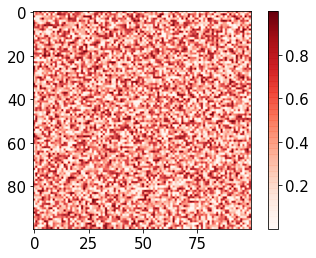

In [305]:
ncolors  = 256

color_array = plt.get_cmap('Reds')(range(ncolors))
print(color_array.shape)
print(color_array)

color_array[:,-1] = np.linspace(0.3,1,ncolors)
import matplotlib.colors as colors
from matplotlib.colors import LinearSegmentedColormap

map_object = LinearSegmentedColormap.from_list(name="Reds_transp", colors = color_array)

plt.register_cmap(cmap = map_object)
fig,ax= plt.subplots()
h = ax.imshow(np.random.rand(100,100), cmap='Reds_transp')
plt.colorbar(mappable=h)

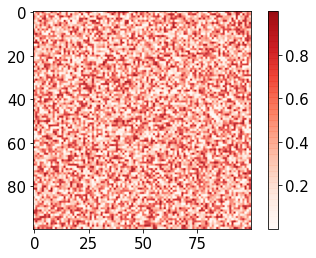

In [306]:
def trunc_colormap(cmap,minval=0.0,maxval= 1.0,n=100):
    new_cmap = LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval,b=maxval),
                                                cmap(np.linspace(minval,maxval,n)))
    return new_cmap
cmap = plt.get_cmap('Reds_transp')
new_cmap = trunc_colormap(cmap,0.0,.9)

fig,ax= plt.subplots()
h = ax.imshow(np.random.rand(100,100), cmap=new_cmap)
plt.colorbar(mappable=h)

In [275]:
total_infect = np.sum(res['baseline'][4]) + np.sum(res['baseline'][5])
total_infect

3776506.181287417

In [ ]:
_i_go_work_75 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [196]:
_i_go_work_50 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [199]:
_i_go_work_25 = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [190]:
_i_work_0     = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

In [187]:
base_case     = res['baseline'][2][::12,1] + res['baseline'][0][::12,1]

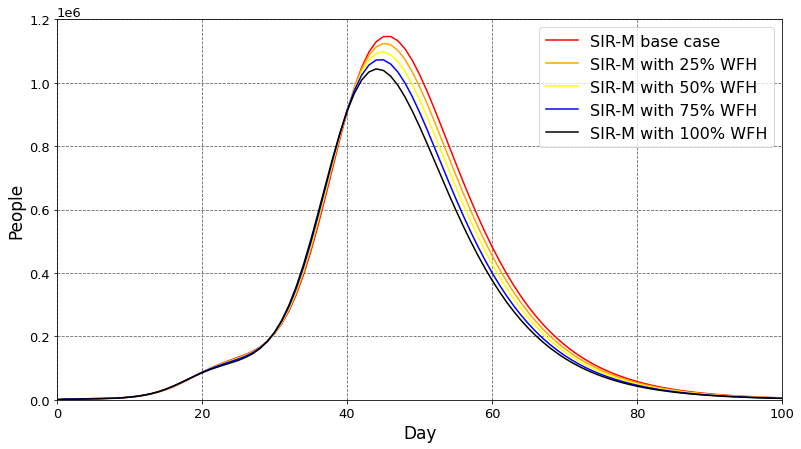

In [200]:
work_restriction_result = '/Users/cptnemo2005/Desktop/SEIR/results/workrestriction/'

def sir_plot_r(x,y,z,a,b):
    plt.figure(figsize=(13,7))
    plt.xlim(0,100,1)
    plt.ylim(0, 1200000,100000)
    plt.xlabel("Day",fontsize=17) # Text for X-Axis
    plt.ylabel("People",fontsize=17) 
    plt.plot(x, color='red',label='SIR-M base case')
    plt.plot(y, color='orange',label='SIR-M with 25% WFH ')
    plt.plot(z, color='yellow',label='SIR-M with 50% WFH')
    plt.plot(a, color='blue',label='SIR-M with 75% WFH')
    plt.plot(b, color='black',label='SIR-M with 100% WFH')
    #plt.plot(k, color='k',label='Staggered work ',linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.rc('xtick',labelsize=13)
    plt.rc('ytick',labelsize=13)
    plt.legend(loc=1, prop={'size':16})
    
    plt.savefig(work_restriction_result + 'work-restriction-level-incubation-'+ str(incubation)+ '.jpg')
    
sir_plot_r(base_case,
           _i_go_work_75,
           _i_go_work_50,
           _i_go_work_25,
          _i_work_0) 

In [78]:
import pandas as pd

episim_data = pd.read_excel(open('/Users/cptnemo2005/Desktop/SEIR/Book1.xlsx', 'rb'),sheet_name='Sheet1')

EPSIM_sc_wfh         = episim_data['sc_wfh']
EPSIM_sc       = episim_data['sc']
EPSIM_base = episim_data['Base case']
EPSIM_FROM_HOME = episim_data['Work from home']
EPSIM_50_FROM_HOME = episim_data['50% Work from home']

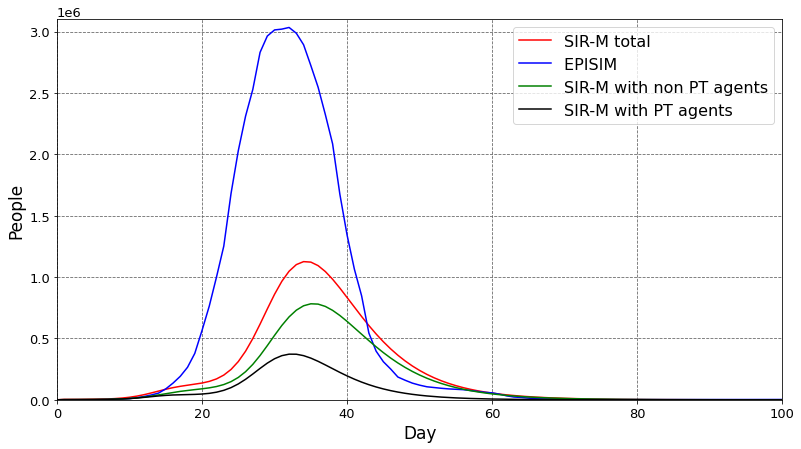

In [163]:
def sir_plot_r(x,y,z,a):
    plt.figure(figsize=(13,7))
    plt.xlim(0,100,1)
    plt.ylim(0, 3100000,100000)
    plt.xlabel("Day",fontsize=17) # Text for X-Axis
    plt.ylabel("People",fontsize=17) 
    plt.plot(x, color='r',label='SIR-M total')
    plt.plot(y, color='b',label='EPISIM ')
    plt.plot(z, color='g',label='SIR-M with non PT agents')
    plt.plot(a, color='k',label='SIR-M with PT agents')
    #plt.plot(k, color='k',label='Staggered work ',linestyle='--')
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.rc('xtick',labelsize=13)
    plt.rc('ytick',labelsize=13)
    plt.legend(loc=1, prop={'size':16})
    
    plt.savefig('new.jpg')
    
sir_plot_r(total_infect,EPSIM_base,infect_pc,infect_pt) 